# Get necessary information of the dataset

In [25]:
# Import packages and libraries
import os
import sys

import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

## 1 Data files

In [15]:
file_dir_images = "data/train_images_256/"
file_dir_masks  = "data/train_masks_256/"

file_images = os.listdir(file_dir_images)
file_masks = os.listdir(file_dir_masks)

print("Images: ", file_images[:5], "Masks : ", file_masks[:5],
     "Total Num Img:", len(os.listdir(file_dir_images)),
     "Total Num Msk:", len(os.listdir(file_dir_images)))

Images:  ['041869.000141.tif', '045592.000027.tif', '045589.000334.tif', '045553.000191.tif', '045592.000176.tif'] Masks :  ['041869.000141.tif', '045592.000027.tif', '045589.000334.tif', '045553.000191.tif', '045592.000176.tif'] Total Num Img: 790 Total Num Msk: 790


## 2 Data info.

In [141]:
# mask[0,:] = Image.open(file_dir_masks + file_masks[0])
# img[0,:] = Image.open(file_dir_images + file_images[0])
num2read = 20
masks = np.array([np.array(Image.open(file_dir_masks + fname)) for fname in file_masks[:num2read]])
imgs = np.array([np.array(Image.open(file_dir_images + fname)) for fname in file_images[:num2read]])

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Image Size:  (256, 256) | Mask Size:  (256, 256)
Image Value Max/AVE/Min: 65535/29090.958435058594/9915
Mask Value Max/Min: 2/0
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


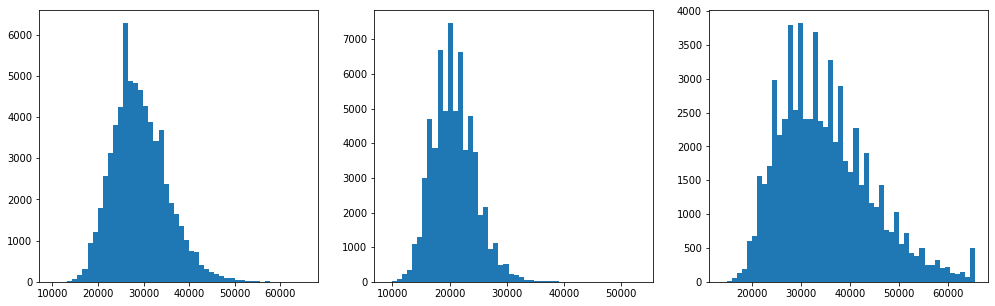

In [142]:
print("*-" * 30)
print("Image Size: ", mask1.size,"| Mask Size: ", img1.size)
print(f"Image Value Max/AVE/Min: {np.max(img1)}/{np.mean(img1)}/{np.min(img1)}" )
print(f"Mask Value Max/Min: {np.max(mask1)}/{np.min(mask1)}" )
print("*-" * 30)

fig, axs = plt.subplots(1,3,figsize=(17,5))
for i in range(3):
    plt.axes(axs[i])
    plt.hist(np.reshape(imgs[i],-1), bins=50)

plt.show()

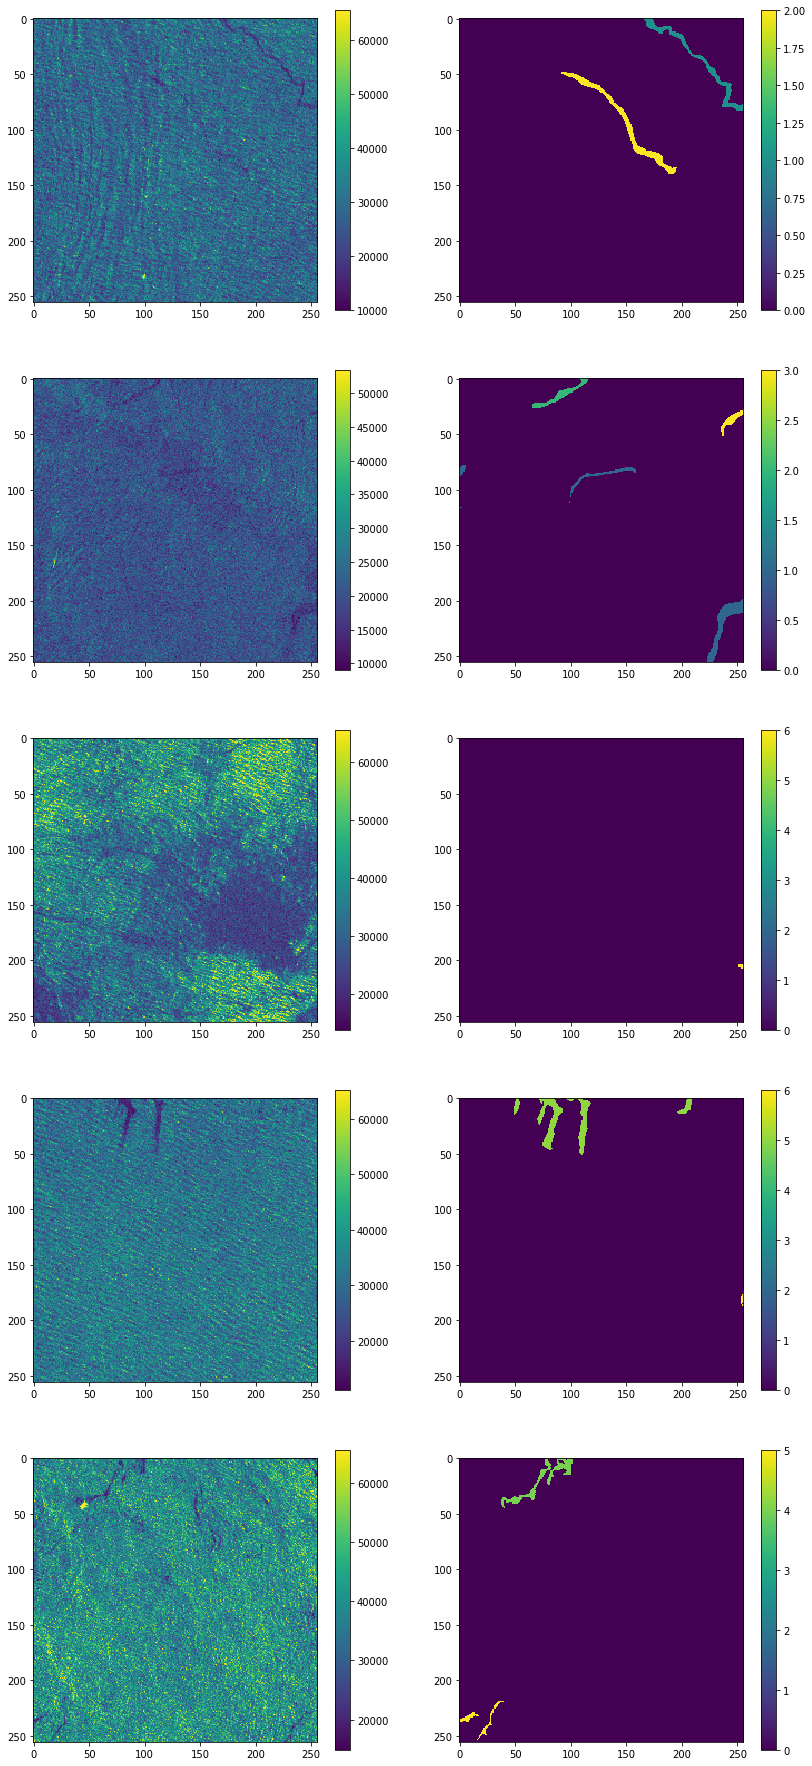

In [155]:
num2sh = 5

fig, axs = plt.subplots(num2sh, 2, figsize=(14,32))

for i in range(num2sh):
    for j in range(2):
        plt.axes(axs[i,j])
        if j==0:
            pos = axs[i,j].imshow(imgs[i])
            plt.colorbar(pos, ax=axs[i,j])
        else:
            pos = axs[i,j].imshow(masks[i])
            fig.colorbar(pos, ax=axs[i,j])
            
plt.show()

## 3 Number of Class

In [120]:
class_vals = []
for file_mask in file_masks:
    temp = Image.open(file_dir_masks + file_mask)
    [class_vals.append(e) for e in np.unique(temp) if e not in class_vals]
    
# print("All class labels:", class_vals)
class_vals = np.sort(class_vals)
print("All class labels:", class_vals, 
      '\nNumber of classes:', len(class_vals))

All class labels: [0 1 2 3 4 5 6 7] 
Number of classes: 8
